<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

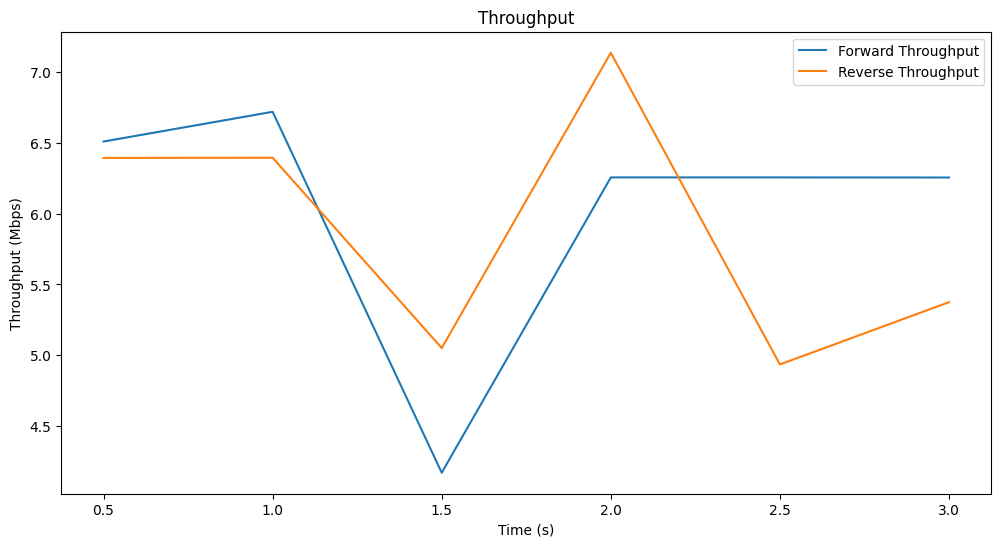

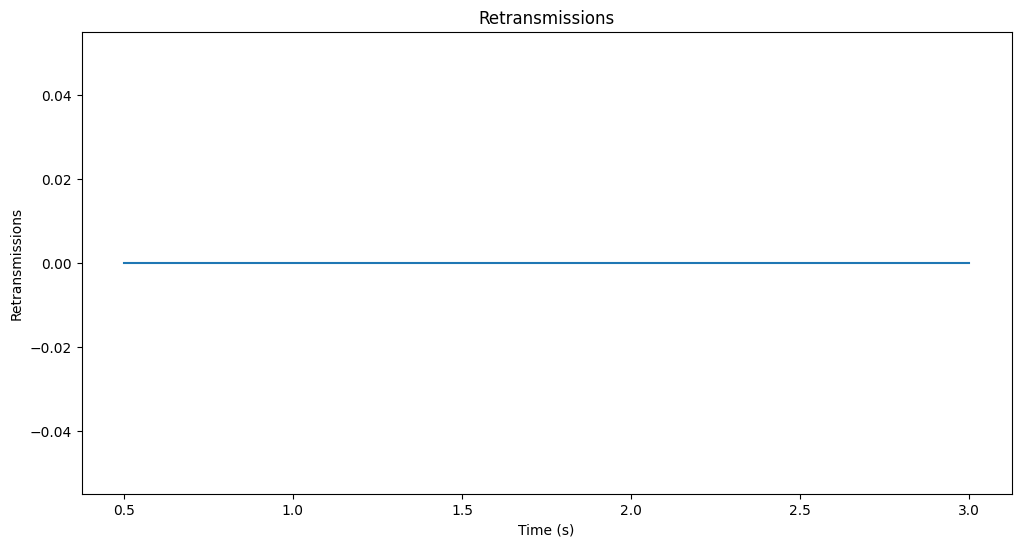

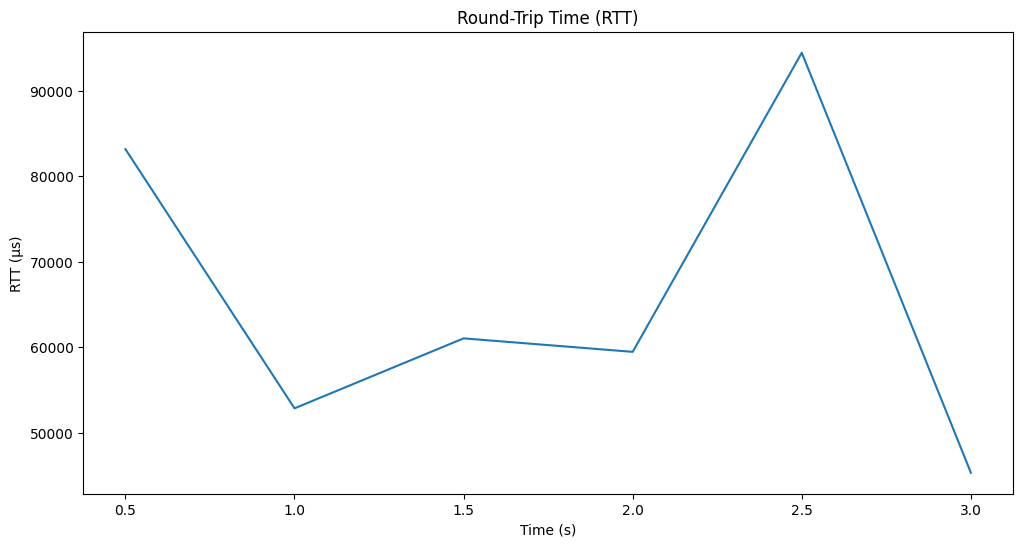

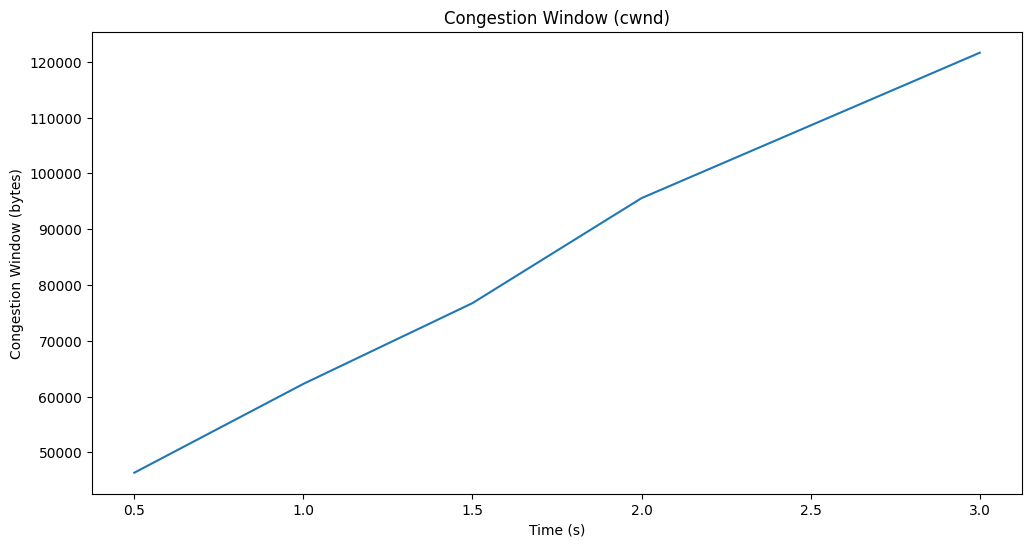

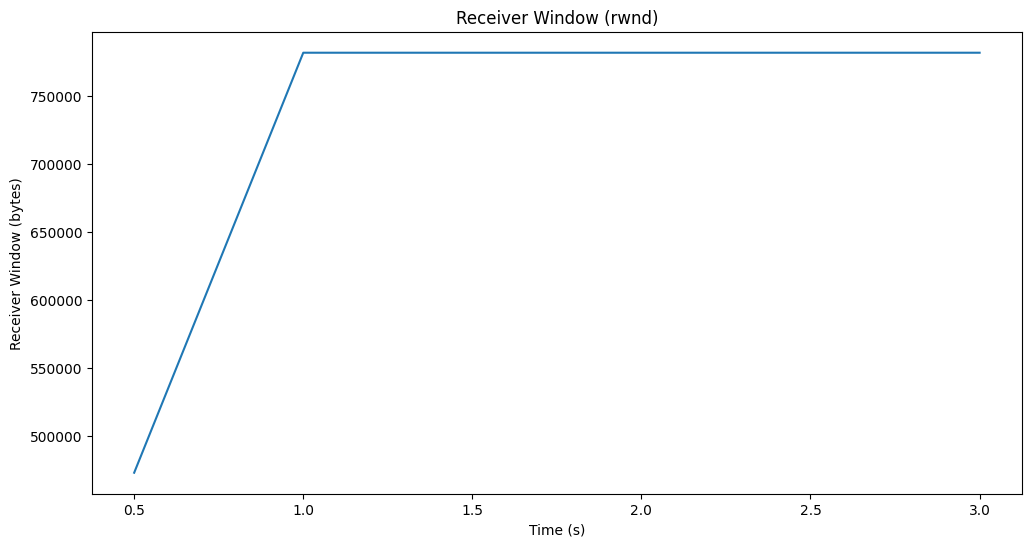

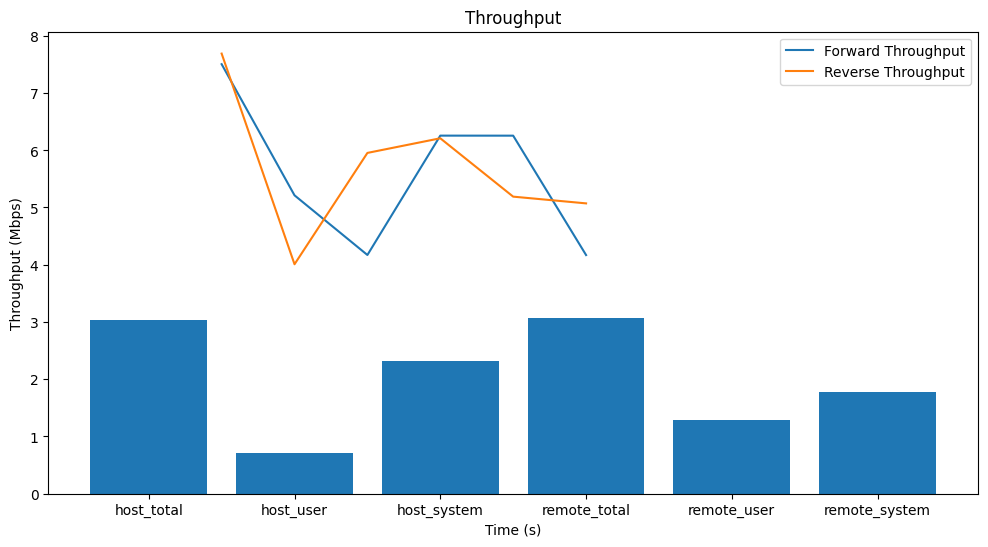

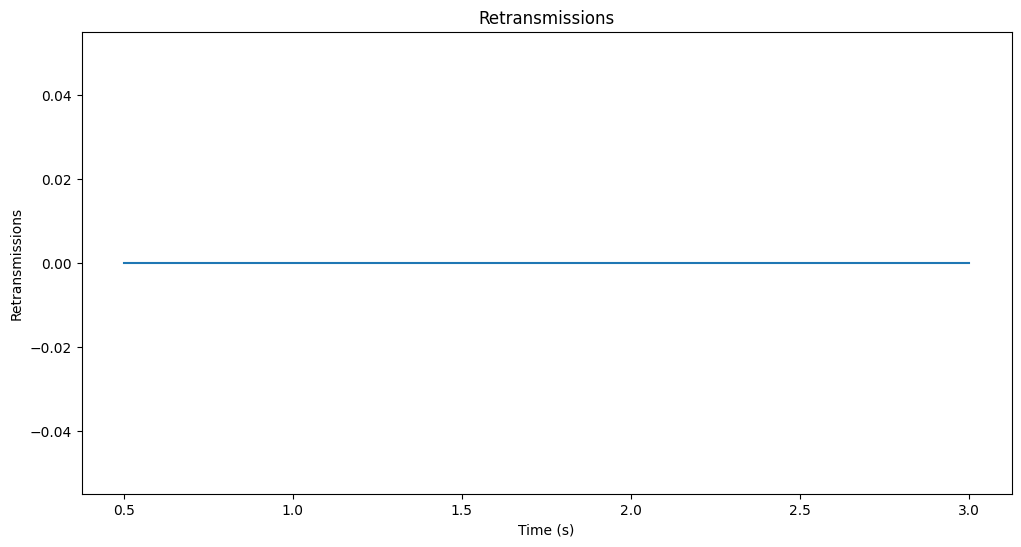

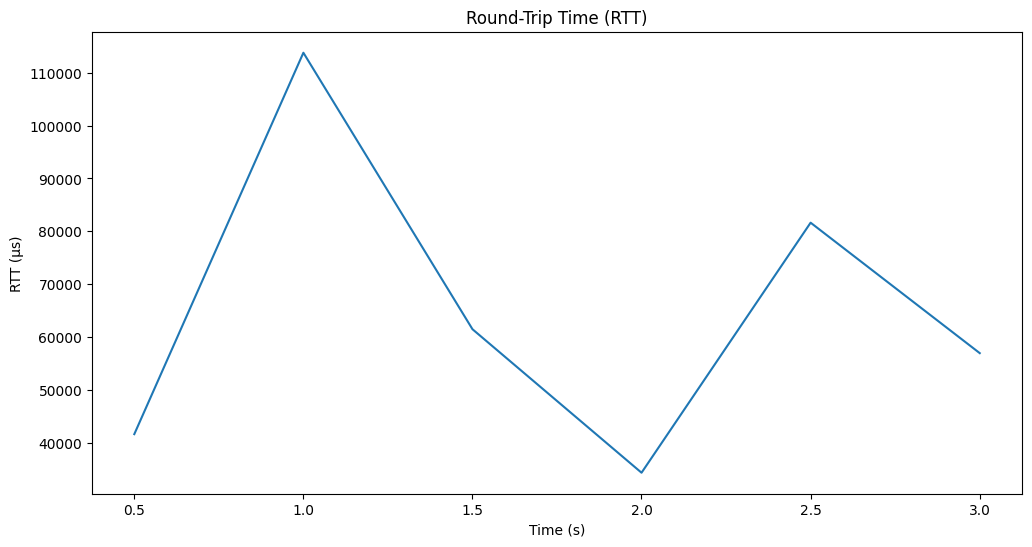

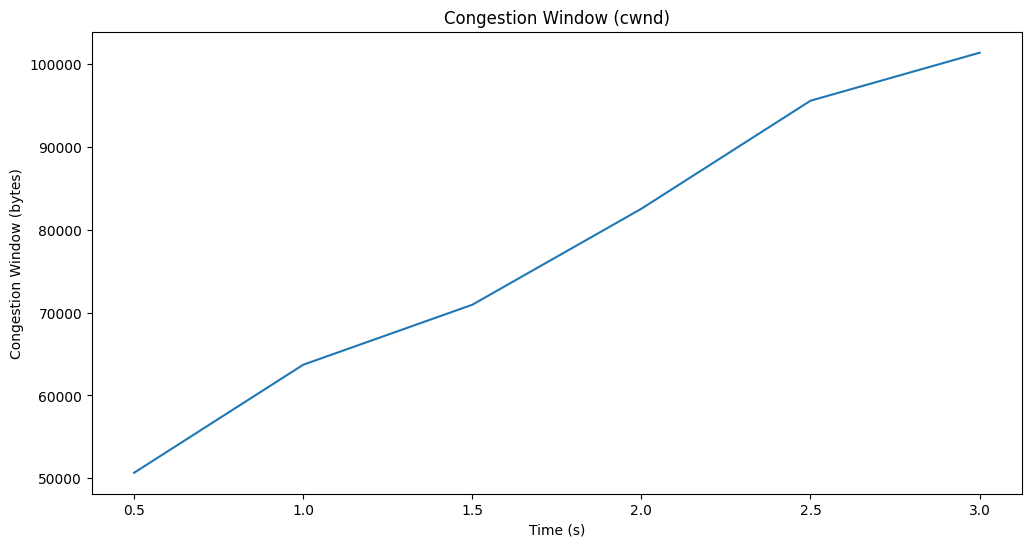

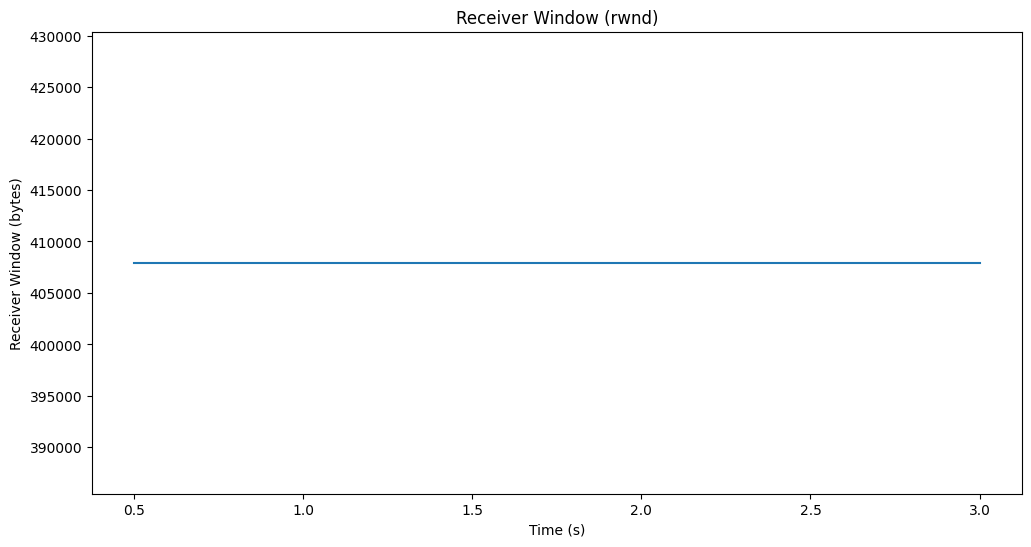

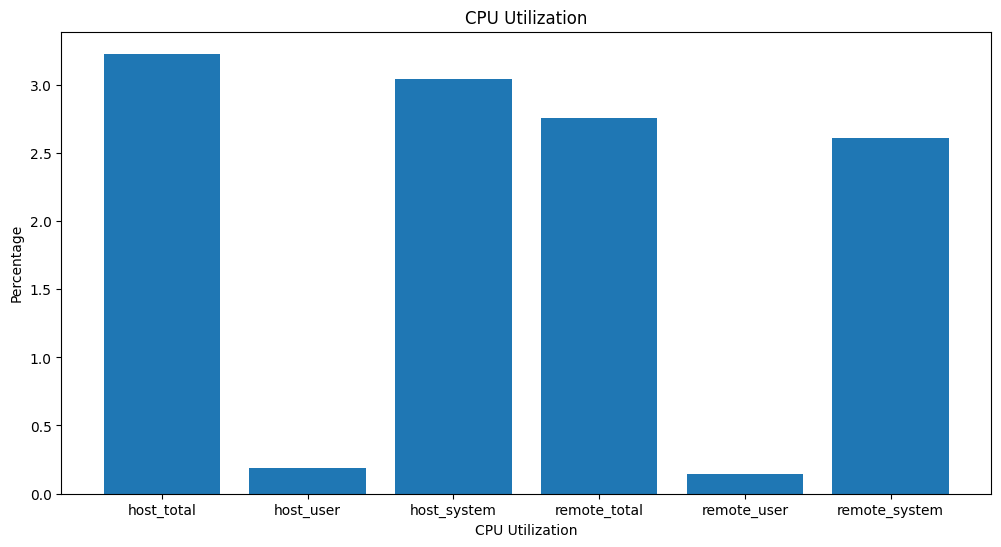

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


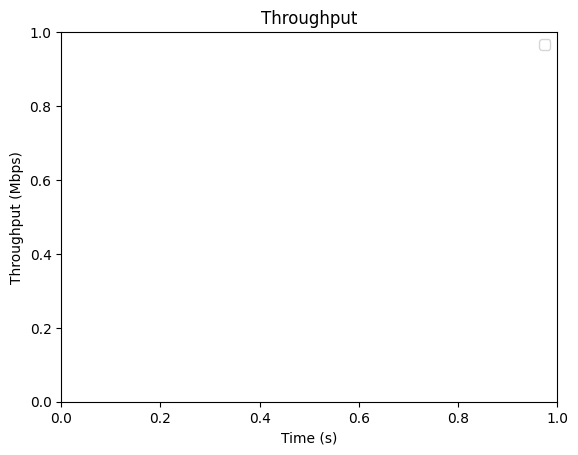

In [9]:
import json
import matplotlib.pyplot as plt

# Load the JSON data
# with open('./data/pi1/iperf0.json') as f:
#     data = json.load(f)
# load all the json files in the folder and iterate over them
import os
import glob

data = []
for filename in glob.glob('./data/pi1/*.json'):
    if "perf"  in filename:
        with open (filename) as f:
            data.append(json.load(f))

# put each iperf on the sme graph

    
# print(data)
    

# Extract relevant data
    
throughput_fig = plt.figure(figsize=(12, 6))
# # Retransmissions
retransmits_fig = plt.figure(figsize=(12, 6))   
# # Round-Trip Time (RTT)
rtt_fig = plt.figure(figsize=(12, 6))
# # Congestion Window (cwnd)
cwnd_fig = plt.figure(figsize=(12, 6))
# # Receiver Window (rwnd)
rwnd_fig = plt.figure(figsize=(12, 6))
# # CPU Utilization
cpu_fig = plt.figure(figsize=(12, 6))


# plot all on the same graph
for d in data:
    intervals = d['intervals']
    num_intervals = len(intervals)
    timestamps = [interval['sum']['end'] for interval in intervals]
    throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
    retransmits = [interval['sum']['retransmits'] for interval in intervals]
    rtts = [interval['streams'][0]['rtt'] for interval in intervals]
    cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
    rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
    reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

    # Throughput
    # throughput_fig = plt.figure(figsize=(12, 6))
    # plot on throughput figure
    plt.figure(throughput_fig.number)
    plt.plot(timestamps, throughputs, label='Forward Throughput')
    plt.plot(timestamps, reverse_throughputs, label='Reverse Throughput')
    plt.xlabel('Time (s)')
    plt.ylabel('Throughput (Mbps)')
    plt.title('Throughput')
    plt.legend()
    plt.show()
    # Retransmissions
    retransmits_fig = plt.figure(figsize=(12, 6))
    plt.plot(timestamps, retransmits)
    plt.xlabel('Time (s)')
    plt.ylabel('Retransmissions')
    plt.title('Retransmissions')
    plt.show()
    # Round-Trip Time (RTT)
    rtt_fig = plt.figure(figsize=(12, 6))
    plt.plot(timestamps, rtts)
    plt.xlabel('Time (s)')
    plt.ylabel('RTT (μs)')
    plt.title('Round-Trip Time (RTT)')
    plt.show()
    # Congestion Window (cwnd)
    cwnd_fig = plt.figure(figsize=(12, 6))
    plt.plot(timestamps, cwnds)
    plt.xlabel('Time (s)')
    plt.ylabel('Congestion Window (bytes)')
    plt.title('Congestion Window (cwnd)')
    plt.show()
    # Receiver Window (rwnd)
    rwnd_fig = plt.figure(figsize=(12, 6))
    plt.plot(timestamps, rwnds)
    plt.xlabel('Time (s)')
    plt.ylabel('Receiver Window (bytes)')
    plt.title('Receiver Window (rwnd)')
    plt.show()
    # CPU Utilization
    cpu_util = d['end']['cpu_utilization_percent']
    cpu_names = list(cpu_util.keys())
    cpu_values = list(cpu_util.values())
    
    cpu_fig = plt.figure(figsize=(12, 6))
    plt.bar(cpu_names, cpu_values)
    plt.xlabel('CPU Utilization')
    plt.ylabel('Percentage')
    plt.title('CPU Utilization')
    
plt.show()


 
# 

plt.xlabel('Time (s)')
plt.ylabel('Throughput (Mbps)')
plt.title('Throughput')
plt.legend()
plt.show()

#     # CPU Utilization
# intervals = data['intervals']
# num_intervals = len(intervals)
# timestamps = [interval['sum']['end'] for interval in intervals]
# throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
# retransmits = [interval['sum']['retransmits'] for interval in intervals]
# rtts = [interval['streams'][0]['rtt'] for interval in intervals]
# cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
# rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
# reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# # Throughput
# plt.figure(figsize=(12, 6))
# plt.plot(timestamps, throughputs, label='Forward Throughput')
# plt.plot(timestamps, reverse_throughputs, label='Reverse Throughput')
# plt.xlabel('Time (s)')
# plt.ylabel('Throughput (Mbps)')
# plt.title('Throughput')
# plt.legend()
# plt.show()

# # Retransmissions
# plt.figure(figsize=(12, 6))
# plt.plot(timestamps, retransmits)
# plt.xlabel('Time (s)')
# plt.ylabel('Retransmissions')
# plt.title('Retransmissions')
# plt.show()

# # Round-Trip Time (RTT)
# plt.figure(figsize=(12, 6))
# plt.plot(timestamps, rtts)
# plt.xlabel('Time (s)')
# plt.ylabel('RTT (μs)')
# plt.title('Round-Trip Time (RTT)')
# plt.show()

# # Congestion Window (cwnd)
# plt.figure(figsize=(12, 6))
# plt.plot(timestamps, cwnds)
# plt.xlabel('Time (s)')
# plt.ylabel('Congestion Window (bytes)')
# plt.title('Congestion Window (cwnd)')
# plt.show()

# # Receiver Window (rwnd)
# plt.figure(figsize=(12, 6))
# plt.plot(timestamps, rwnds)
# plt.xlabel('Time (s)')
# plt.ylabel('Receiver Window (bytes)')
# plt.title('Receiver Window (rwnd)')
# plt.show()

# # CPU Utilization
# cpu_util = data['end']['cpu_utilization_percent']
# cpu_names = list(cpu_util.keys())
# cpu_values = list(cpu_util.values())

# plt.figure(figsize=(12, 6))
# plt.bar(cpu_names, cpu_values)
# plt.xlabel('CPU Utilization')
# plt.ylabel('Percentage')
# plt.title('CPU Utilization')
# plt.show()

In [10]:
import json
import statistics

# # Load the JSON data
# with open('test.json') as f:
#     data = json.load(f)

# Extract relevant data
intervals = data['intervals']
num_intervals = len(intervals)
throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
retransmits = [interval['sum']['retransmits'] for interval in intervals]
rtts = [interval['streams'][0]['rtt'] for interval in intervals]
cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# Throughput Statistics
print("Throughput Statistics (Mbps):")
print(f"Mean Forward Throughput: {statistics.mean(throughputs):.2f}")
print(f"Median Forward Throughput: {statistics.median(throughputs):.2f}")
print(f"Max Forward Throughput: {max(throughputs):.2f}")
print(f"Min Forward Throughput: {min(throughputs):.2f}")
print(f"Standard Deviation Forward Throughput: {statistics.stdev(throughputs):.2f}")
print(f"Mean Reverse Throughput: {statistics.mean(reverse_throughputs):.2f}")
print(f"Median Reverse Throughput: {statistics.median(reverse_throughputs):.2f}")
print(f"Max Reverse Throughput: {max(reverse_throughputs):.2f}")
print(f"Min Reverse Throughput: {min(reverse_throughputs):.2f}")
print(f"Standard Deviation Reverse Throughput: {statistics.stdev(reverse_throughputs):.2f}")

# Retransmissions Statistics
print("\nRetransmissions Statistics:")
print(f"Total Retransmissions: {sum(retransmits)}")
print(f"Mean Retransmissions per Interval: {statistics.mean(retransmits):.2f}")
print(f"Median Retransmissions per Interval: {statistics.median(retransmits)}")
print(f"Max Retransmissions in an Interval: {max(retransmits)}")
print(f"Min Retransmissions in an Interval: {min(retransmits)}")

# RTT Statistics
print("\nRound-Trip Time (RTT) Statistics (μs):")
print(f"Mean RTT: {statistics.mean(rtts):.2f}")
print(f"Median RTT: {statistics.median(rtts):.2f}")
print(f"Max RTT: {max(rtts):.2f}")
print(f"Min RTT: {min(rtts):.2f}")
print(f"Standard Deviation RTT: {statistics.stdev(rtts):.2f}")

# Congestion Window Statistics
print("\nCongestion Window (cwnd) Statistics (bytes):")
print(f"Mean cwnd: {statistics.mean(cwnds):.2f}")
print(f"Median cwnd: {statistics.median(cwnds):.2f}")
print(f"Max cwnd: {max(cwnds):.2f}")
print(f"Min cwnd: {min(cwnds):.2f}")
print(f"Standard Deviation cwnd: {statistics.stdev(cwnds):.2f}")

# Receiver Window Statistics
print("\nReceiver Window (rwnd) Statistics (bytes):")
print(f"Mean rwnd: {statistics.mean(rwnds):.2f}")
print(f"Median rwnd: {statistics.median(rwnds):.2f}")
print(f"Max rwnd: {max(rwnds):.2f}")
print(f"Min rwnd: {min(rwnds):.2f}")
print(f"Standard Deviation rwnd: {statistics.stdev(rwnds):.2f}")

TypeError: list indices must be integers or slices, not str

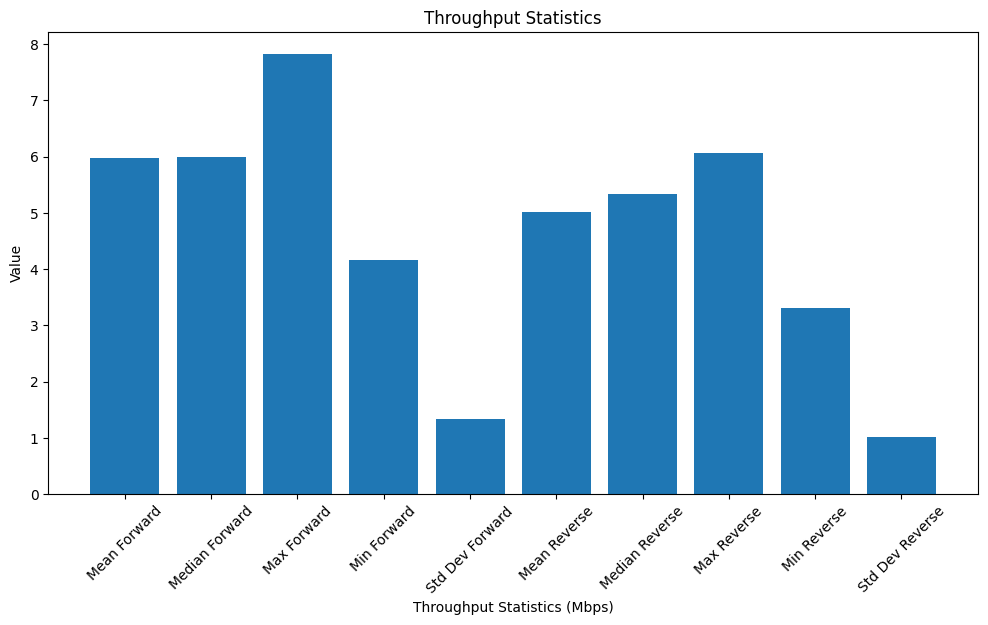

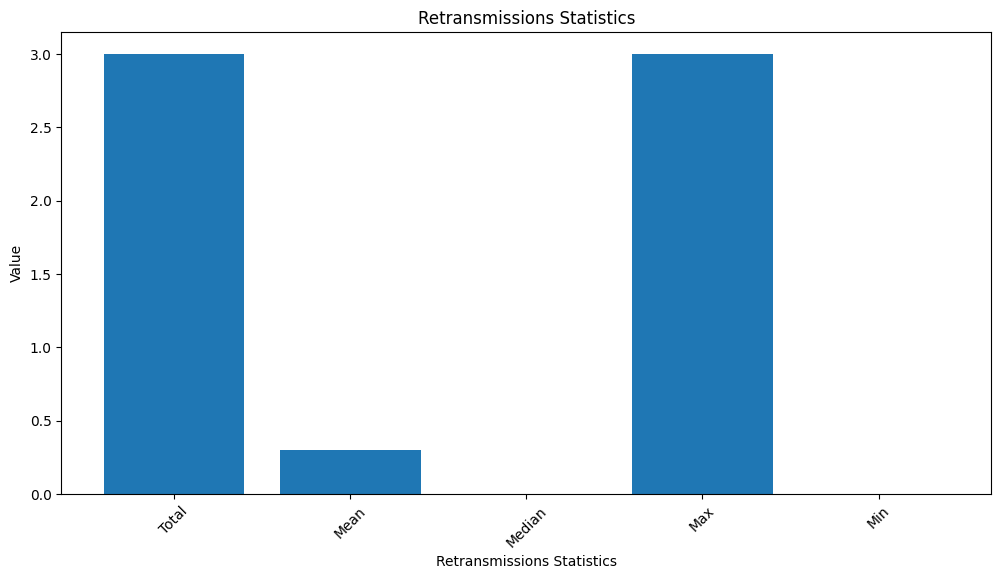

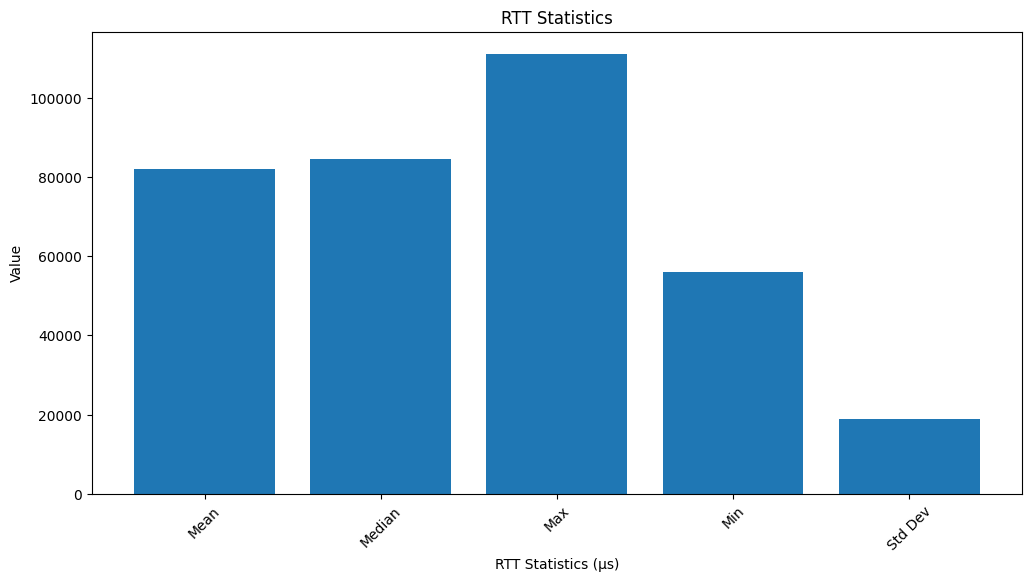

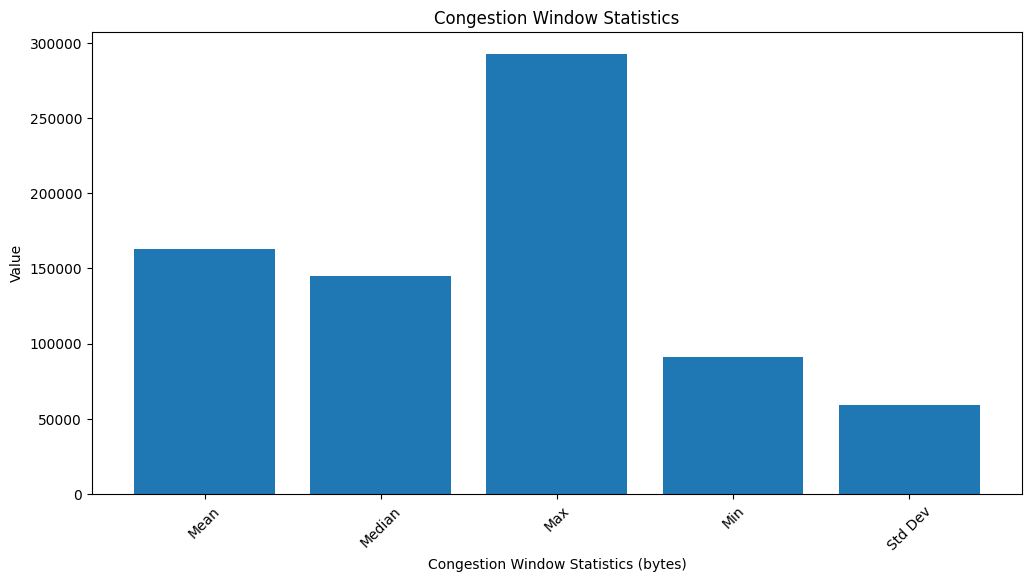

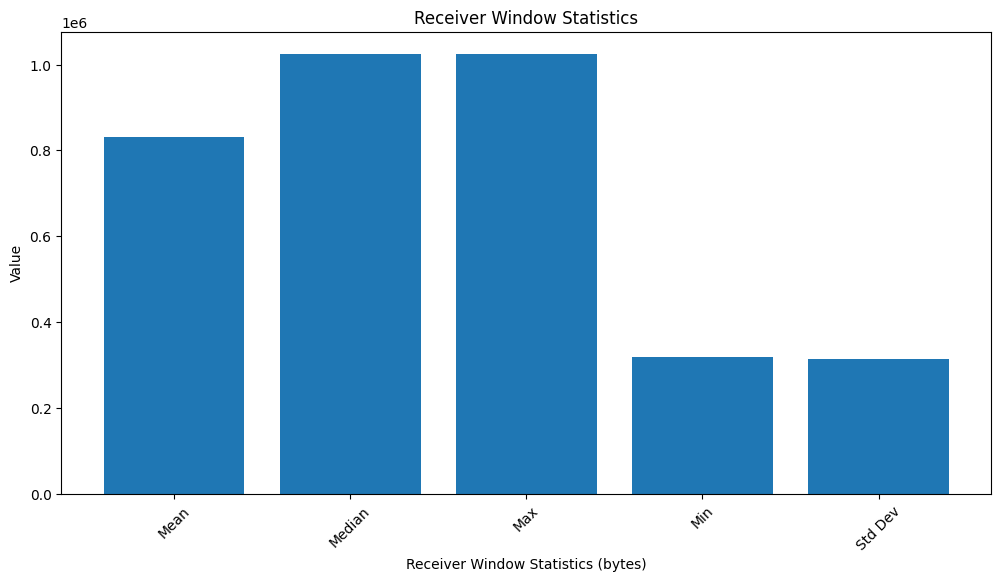

In [8]:
import json
import statistics
import matplotlib.pyplot as plt

# # Load the JSON data
# with open('test.json') as f:
#     data = json.load(f)

# Extract relevant data
intervals = data['intervals']
num_intervals = len(intervals)
throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
retransmits = [interval['sum']['retransmits'] for interval in intervals]
rtts = [interval['streams'][0]['rtt'] for interval in intervals]
cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# Throughput Statistics
throughput_stats = [
    statistics.mean(throughputs),
    statistics.median(throughputs),
    max(throughputs),
    min(throughputs),
    statistics.stdev(throughputs),
    statistics.mean(reverse_throughputs),
    statistics.median(reverse_throughputs),
    max(reverse_throughputs),
    min(reverse_throughputs),
    statistics.stdev(reverse_throughputs)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(throughput_stats)), throughput_stats)
plt.xticks(range(len(throughput_stats)), ['Mean Forward', 'Median Forward', 'Max Forward', 'Min Forward', 'Std Dev Forward', 'Mean Reverse', 'Median Reverse', 'Max Reverse', 'Min Reverse', 'Std Dev Reverse'], rotation=45)
plt.xlabel('Throughput Statistics (Mbps)')
plt.ylabel('Value')
plt.title('Throughput Statistics')
plt.show()

# Retransmissions Statistics
retransmit_stats = [
    sum(retransmits),
    statistics.mean(retransmits),
    statistics.median(retransmits),
    max(retransmits),
    min(retransmits)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(retransmit_stats)), retransmit_stats)
plt.xticks(range(len(retransmit_stats)), ['Total', 'Mean', 'Median', 'Max', 'Min'], rotation=45)
plt.xlabel('Retransmissions Statistics')
plt.ylabel('Value')
plt.title('Retransmissions Statistics')
plt.show()

# RTT Statistics
rtt_stats = [
    statistics.mean(rtts),
    statistics.median(rtts),
    max(rtts),
    min(rtts),
    statistics.stdev(rtts)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(rtt_stats)), rtt_stats)
plt.xticks(range(len(rtt_stats)), ['Mean', 'Median', 'Max', 'Min', 'Std Dev'], rotation=45)
plt.xlabel('RTT Statistics (μs)')
plt.ylabel('Value')
plt.title('RTT Statistics')
plt.show()

# Congestion Window Statistics
cwnd_stats = [
    statistics.mean(cwnds),
    statistics.median(cwnds),
    max(cwnds),
    min(cwnds),
    statistics.stdev(cwnds)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(cwnd_stats)), cwnd_stats)
plt.xticks(range(len(cwnd_stats)), ['Mean', 'Median', 'Max', 'Min', 'Std Dev'], rotation=45)
plt.xlabel('Congestion Window Statistics (bytes)')
plt.ylabel('Value')
plt.title('Congestion Window Statistics')
plt.show()

# Receiver Window Statistics
rwnd_stats = [
    statistics.mean(rwnds),
    statistics.median(rwnds),
    max(rwnds),
    min(rwnds),
    statistics.stdev(rwnds)
]

plt.figure(figsize=(12, 6))
plt.bar(range(len(rwnd_stats)), rwnd_stats)
plt.xticks(range(len(rwnd_stats)), ['Mean', 'Median', 'Max', 'Min', 'Std Dev'], rotation=45)
plt.xlabel('Receiver Window Statistics (bytes)')
plt.ylabel('Value')
plt.title('Receiver Window Statistics')
plt.show()

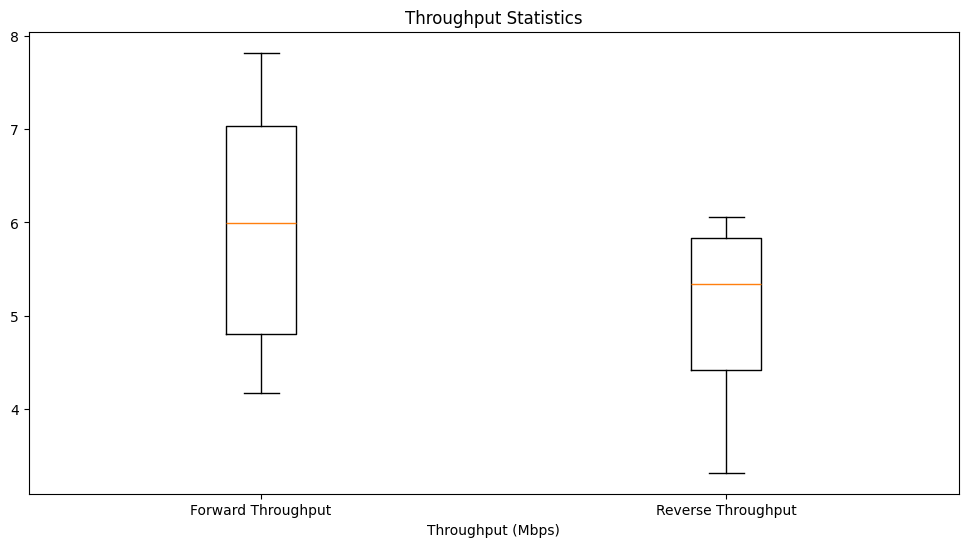

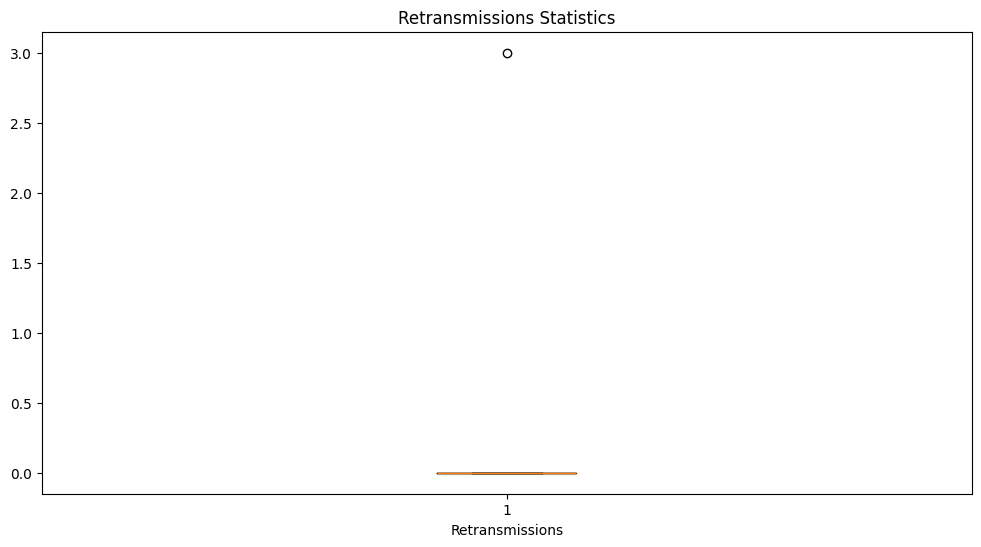

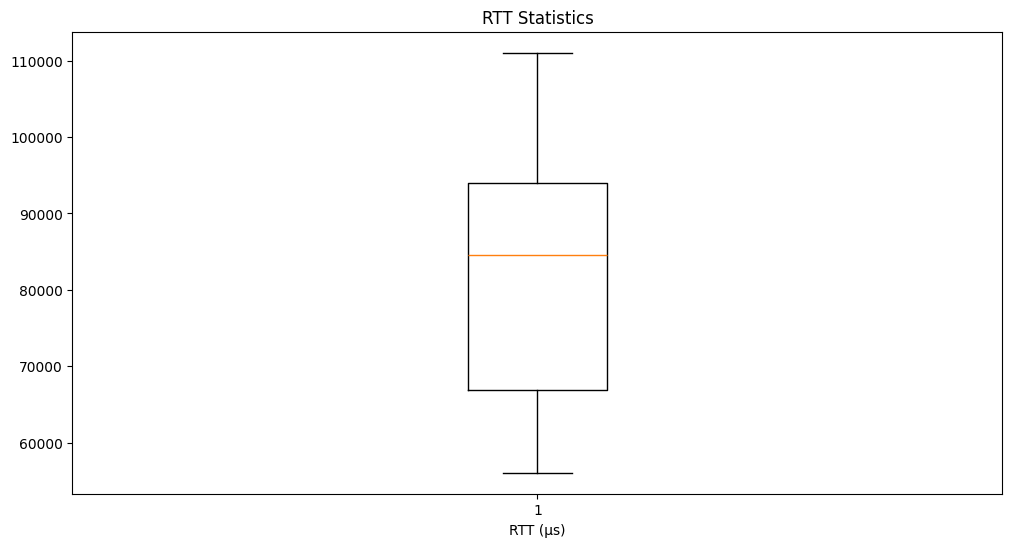

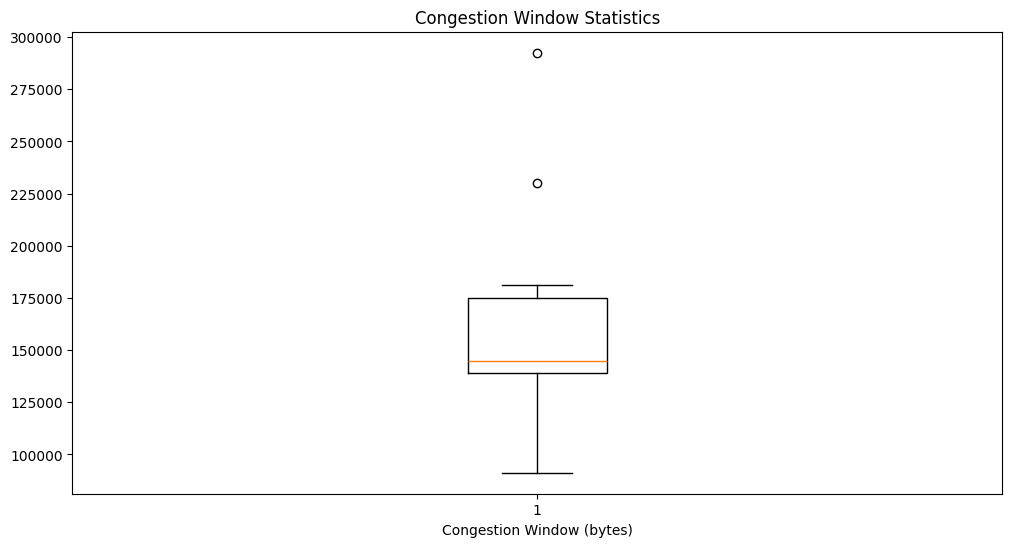

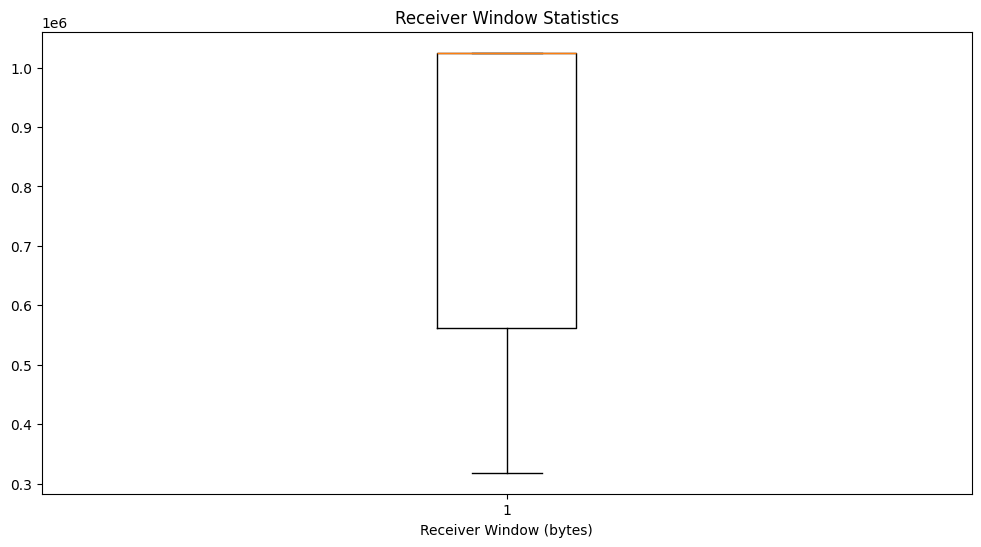

In [9]:
import json
import statistics
import matplotlib.pyplot as plt

# Load the JSON data
with open('test.json') as f:
    data = json.load(f)

# Extract relevant data
intervals = data['intervals']
num_intervals = len(intervals)
throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
retransmits = [interval['sum']['retransmits'] for interval in intervals]
rtts = [interval['streams'][0]['rtt'] for interval in intervals]
cwnds = [interval['streams'][0]['snd_cwnd'] for interval in intervals]
rwnds = [interval['streams'][0]['snd_wnd'] for interval in intervals]
reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps

# Throughput Statistics
throughput_stats = [throughputs, reverse_throughputs]
throughput_labels = ['Forward Throughput', 'Reverse Throughput']

plt.figure(figsize=(12, 6))
plt.boxplot(throughput_stats, labels=throughput_labels)
plt.xlabel('Throughput (Mbps)')
plt.title('Throughput Statistics')
plt.show()

# Retransmissions Statistics
plt.figure(figsize=(12, 6))
plt.boxplot(retransmits)
plt.xlabel('Retransmissions')
plt.title('Retransmissions Statistics')
plt.show()

# RTT Statistics
plt.figure(figsize=(12, 6))
plt.boxplot(rtts)
plt.xlabel('RTT (μs)')
plt.title('RTT Statistics')
plt.show()

# Congestion Window Statistics
plt.figure(figsize=(12, 6))
plt.boxplot(cwnds)
plt.xlabel('Congestion Window (bytes)')
plt.title('Congestion Window Statistics')
plt.show()

# Receiver Window Statistics
plt.figure(figsize=(12, 6))
plt.boxplot(rwnds)
plt.xlabel('Receiver Window (bytes)')
plt.title('Receiver Window Statistics')
plt.show()

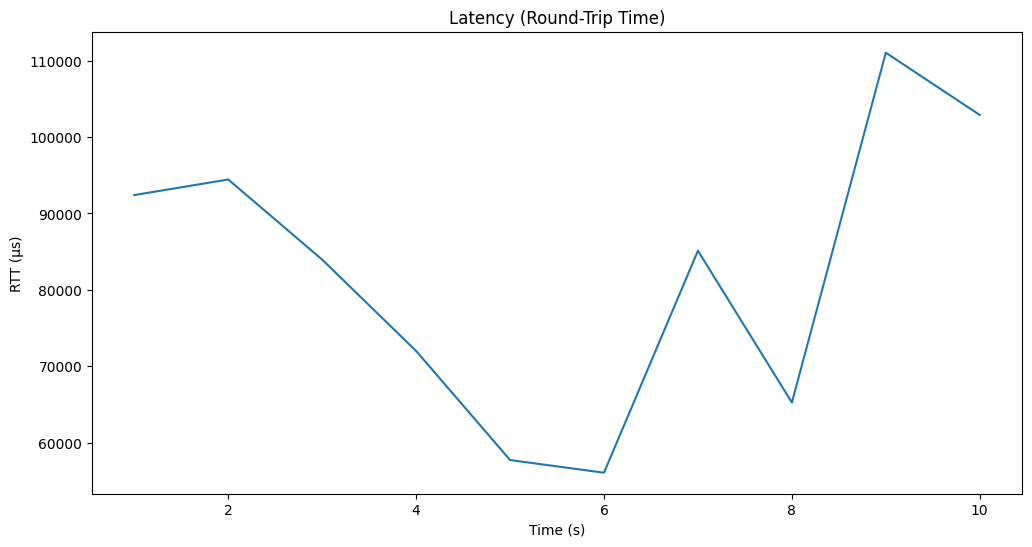

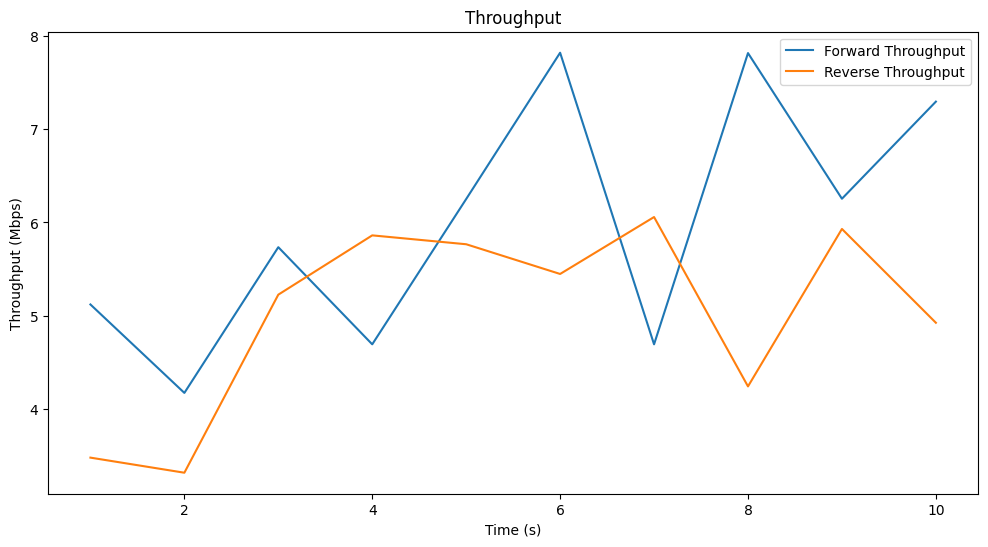

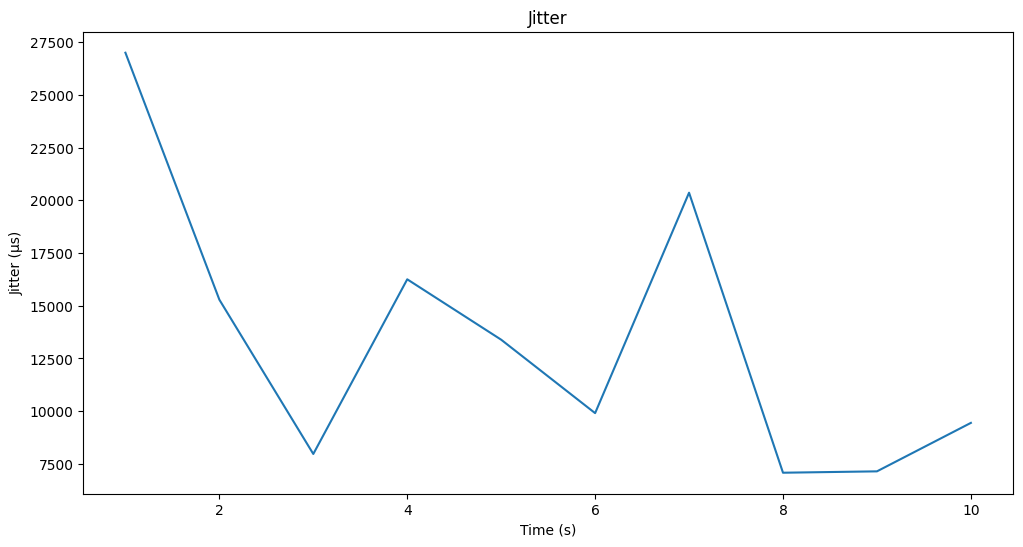

Connected Hosts:


In [11]:
import json
import statistics
import matplotlib.pyplot as plt

# # Load the JSON data
# with open('test.json') as f:
#     data = json.load(f)

# Extract relevant data
intervals = data['intervals']
num_intervals = len(intervals)
timestamps = [interval['sum']['end'] for interval in intervals]
throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
rtts = [interval['streams'][0]['rtt'] for interval in intervals]
jitters = [interval['streams'][0]['rttvar'] for interval in intervals]

# Latency (RTT)
plt.figure(figsize=(12, 6))
plt.plot(timestamps, rtts)
plt.xlabel('Time (s)')
plt.ylabel('RTT (μs)')
plt.title('Latency (Round-Trip Time)')
plt.show()

# Throughput
plt.figure(figsize=(12, 6))
plt.plot(timestamps, throughputs, label='Forward Throughput')
plt.plot(timestamps, reverse_throughputs, label='Reverse Throughput')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (Mbps)')
plt.title('Throughput')
plt.legend()
plt.show()

# Jitter
plt.figure(figsize=(12, 6))
plt.plot(timestamps, jitters)
plt.xlabel('Time (s)')
plt.ylabel('Jitter (μs)')
plt.title('Jitter')
plt.show()

# Connectivity
connected_hosts = set()
for interval in data['intervals']:
    for stream in interval['streams']:
        if 'local_host' in stream and 'remote_host' in stream:
            connected_hosts.add((stream['local_host'], stream['remote_host']))

print("Connected Hosts:")
for local_host, remote_host in connected_hosts:
    print(f"Local Host: {local_host}, Remote Host: {remote_host}")

['data/pi1/data0.json', 'data/pi1/data1.json', 'data/pi1/data2.json']


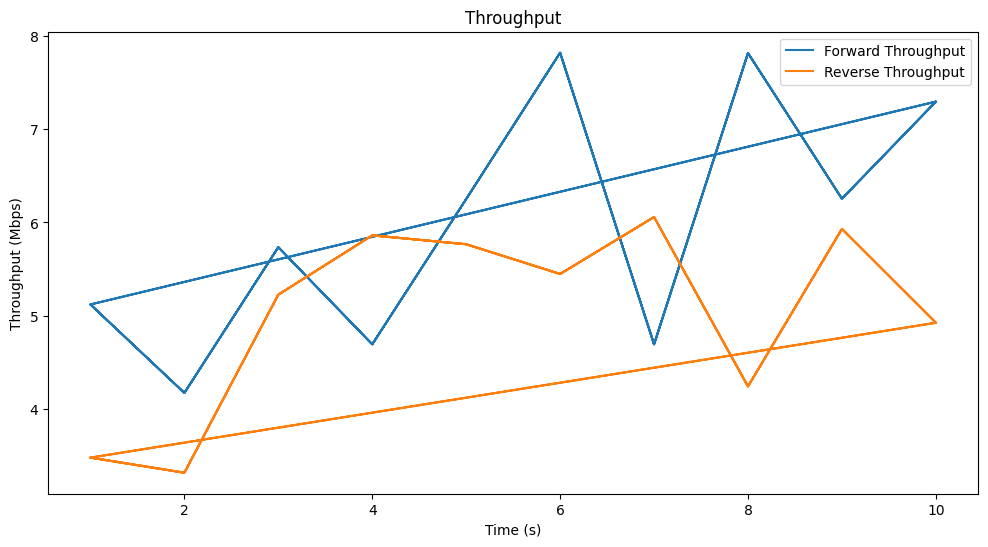

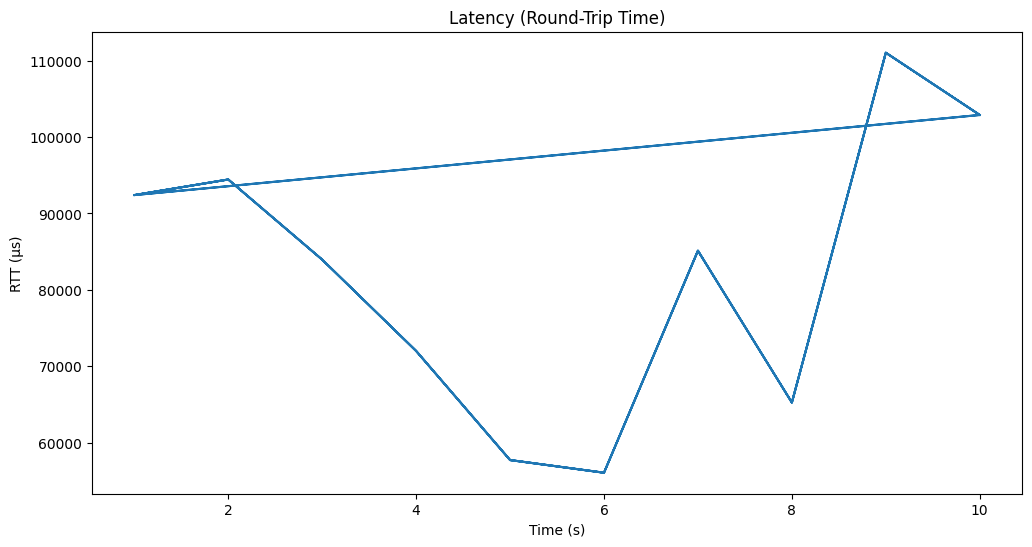

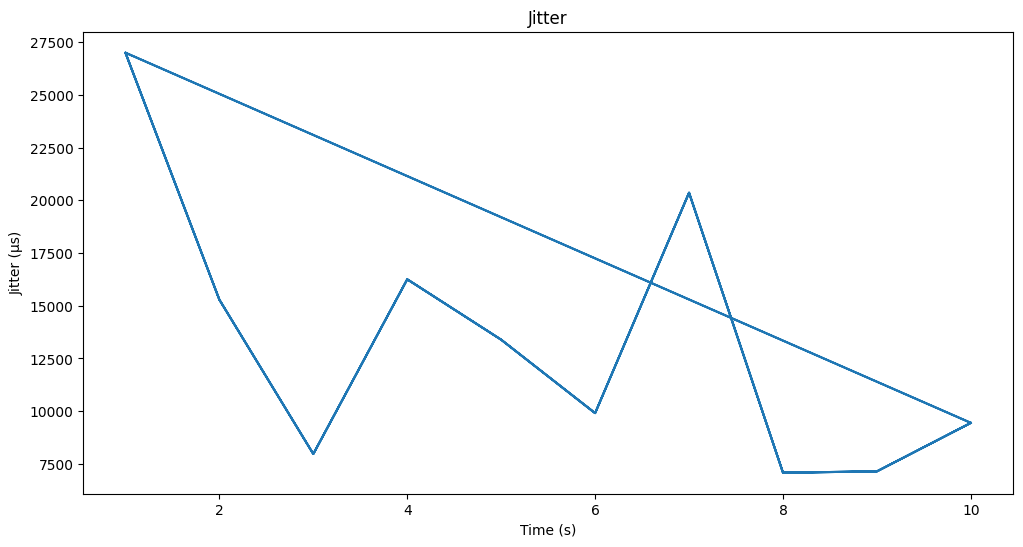

Throughput Statistics (Mbps):
Mean Forward Throughput: 5.99
Median Forward Throughput: 5.99
Max Forward Throughput: 7.82
Min Forward Throughput: 4.17
Standard Deviation Forward Throughput: 1.29
Mean Reverse Throughput: 5.02
Median Reverse Throughput: 5.34
Max Reverse Throughput: 6.06
Min Reverse Throughput: 3.31
Standard Deviation Reverse Throughput: 0.98


In [13]:
import json
import statistics
import matplotlib.pyplot as plt
import glob

# List of JSON files
json_files = glob.glob('data/pi1/*.json')
print(json_files)

# Initialize lists to store data
all_timestamps = []
all_throughputs = []
all_reverse_throughputs = []
all_rtts = []
all_jitters = []

# Iterate over JSON files and extract data
for json_file in json_files:
    with open(json_file) as f:
        data = json.load(f)

    intervals = data['intervals']
    timestamps = [interval['sum']['end'] for interval in intervals]
    throughputs = [interval['sum']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
    reverse_throughputs = [interval['sum_bidir_reverse']['bits_per_second'] / 1e6 for interval in intervals]  # Convert to Mbps
    rtts = [interval['streams'][0]['rtt'] for interval in intervals]
    jitters = [interval['streams'][0]['rttvar'] for interval in intervals]

    all_timestamps.extend(timestamps)
    all_throughputs.extend(throughputs)
    all_reverse_throughputs.extend(reverse_throughputs)
    all_rtts.extend(rtts)
    all_jitters.extend(jitters)

# Data analysis and visualization
plt.figure(figsize=(12, 6))
plt.plot(all_timestamps, all_throughputs, label='Forward Throughput')
plt.plot(all_timestamps, all_reverse_throughputs, label='Reverse Throughput')
plt.xlabel('Time (s)')
plt.ylabel('Throughput (Mbps)')
plt.title('Throughput')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(all_timestamps, all_rtts)
plt.xlabel('Time (s)')
plt.ylabel('RTT (μs)')
plt.title('Latency (Round-Trip Time)')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(all_timestamps, all_jitters)
plt.xlabel('Time (s)')
plt.ylabel('Jitter (μs)')
plt.title('Jitter')
plt.show()

# Throughput statistics
print("Throughput Statistics (Mbps):")
print(f"Mean Forward Throughput: {statistics.mean(all_throughputs):.2f}")
print(f"Median Forward Throughput: {statistics.median(all_throughputs):.2f}")
print(f"Max Forward Throughput: {max(all_throughputs):.2f}")
print(f"Min Forward Throughput: {min(all_throughputs):.2f}")
print(f"Standard Deviation Forward Throughput: {statistics.stdev(all_throughputs):.2f}")
print(f"Mean Reverse Throughput: {statistics.mean(all_reverse_throughputs):.2f}")
print(f"Median Reverse Throughput: {statistics.median(all_reverse_throughputs):.2f}")
print(f"Max Reverse Throughput: {max(all_reverse_throughputs):.2f}")
print(f"Min Reverse Throughput: {min(all_reverse_throughputs):.2f}")
print(f"Standard Deviation Reverse Throughput: {statistics.stdev(all_reverse_throughputs):.2f}")

#draw topology

In [15]:
import json

def read_batman_topology(file_path):
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            return data
    except FileNotFoundError:
        print("File not found.")
        return None
    except json.JSONDecodeError:
        print("Invalid JSON format.")
        return None

# Example usage:
file_path = './topology.json'
batman_topology = read_batman_topology(file_path)
if batman_topology:
    print("BATMAN Topology:")
    print(batman_topology)


BATMAN Topology:
{'source_version': 'debian-2023.0-1', 'algorithm': 4, 'vis': [{'primary': 'b8:27:eb:43:8e:82', 'neighbors': [{'router': 'b8:27:eb:43:8e:82', 'neighbor': 'd8:3a:dd:f5:1f:14', 'metric': '1.308'}, {'router': 'b8:27:eb:43:8e:82', 'neighbor': '2c:cf:67:26:66:49', 'metric': '1.143'}, {'router': 'b8:27:eb:43:8e:82', 'neighbor': '2c:cf:67:26:66:3a', 'metric': '1.378'}, {'router': 'b8:27:eb:43:8e:82', 'neighbor': '2c:cf:67:26:66:51', 'metric': '1.067'}, {'router': 'b8:27:eb:43:8e:82', 'neighbor': '2c:cf:67:26:66:d0', 'metric': '1.244'}], 'clients': ['33:33:ff:d2:7f:5f', '33:33:00:00:00:fb', '01:00:5e:00:00:01', '01:00:5e:00:00:fb', 'd6:56:90:d2:7f:5f', '33:33:00:00:00:01']}]}


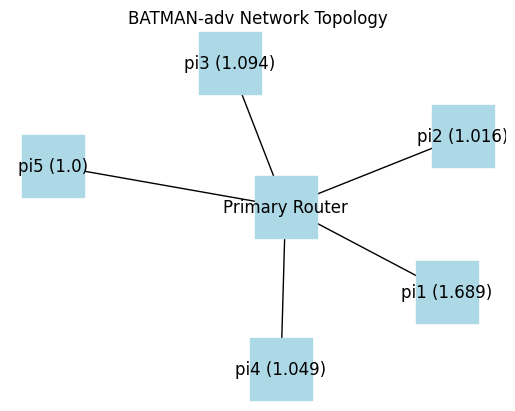

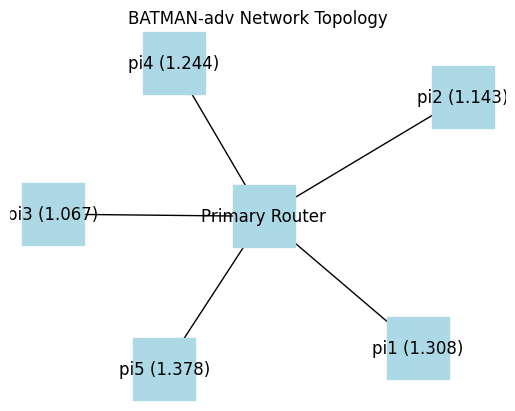

In [36]:
import json
import networkx as nx
import matplotlib.pyplot as plt

def read_batman_topology(file_path):
    try:
        with open(file_path, 'r') as file:
            data = json.load(file)
            return data
    except FileNotFoundError:
        print("File not found.")
        return None
    except json.JSONDecodeError:
        print("Invalid JSON format.")
        return None

def draw_batman_topology(batman_topology, mac_to_name):
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes for primary router and clients
    primary_router = batman_topology['vis'][0]['primary']
    clients = batman_topology['vis'][0]['clients']
    G.add_node(primary_router, type='router', label=mac_to_name.get(primary_router, 'Primary Router'))
    # for client in clients:
        # G.add_node(client, type='client', label=mac_to_name.get(client, 'Client'))

    # Add edges for neighbors with their metrics
    neighbors = batman_topology['vis'][0]['neighbors']
    for neighbor in neighbors:
        router = neighbor['router']
        neighbor_mac = neighbor['neighbor']
        metric = float(neighbor['metric'])
        G.add_node(neighbor_mac, type='router', label=f"{mac_to_name.get(neighbor_mac, 'Neighbor')} ({metric})")
        G.add_edge(router, neighbor_mac)

    # Draw the graph
    pos = nx.spring_layout(G)  # Set positions of nodes
    node_labels = nx.get_node_attributes(G, 'label')

    # Draw nodes as rectangles (squares)
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_shape='s', node_size=2000)
    nx.draw_networkx_labels(G, pos, labels=node_labels)
    nx.draw_networkx_edges(G, pos)

    plt.title('BATMAN-adv Network Topology')
    plt.axis('off')  # Turn off axis
    plt.show()

# Mapping of MAC addresses to names
mac_to_name = {
    '2c:cf:67:26:66:d0': 'pi4',
    '2c:cf:67:26:66:49': 'pi2',
    '2c:cf:67:26:66:3a': 'pi5',
    'd8:3a:dd:f5:1f:14': 'pi1',
    '2c:cf:67:26:66:51': 'pi3'
}

# Example usage:
file_path = './topology.json'
batman_topology = read_batman_topology(file_path)
if batman_topology:
    draw_batman_topology(batman_topology, mac_to_name)

    # Example usage:
file_path = './topology2.json'
batman_topology = read_batman_topology(file_path)
if batman_topology:
    draw_batman_topology(batman_topology, mac_to_name)


In [40]:
import re
import json

reference_string = '''
 172.27.0.1 
172.27.0.0 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 1.83/17.9/56.1
172.27.0.1 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 0.061/0.071/0.089
172.27.0.2 : xmt/rcv/%loss = 5/0/100%
172.27.0.3 : xmt/rcv/%loss = 5/0/100%
172.27.0.4 : xmt/rcv/%loss = 5/0/100%
172.27.0.5 : xmt/rcv/%loss = 5/0/100%
'''
print("REFERENCE")
print(reference_string)

data = reference_string.split("\n")[2:]
print(data)
# get unique ip addresses 
ips = set()
for i in range(len(data)):
    if len(data[i]) > 0:
        ips.add(data[i].split()[0])

print("DATA: ", data)
# remove empty strings
for i in range(len(data)):
    if len(data[i]) == 0:
        data.pop(i)
for d in data: 
    ip,xmt,rcv,loss,min,avg,max =None, None, None, None, None, None, None
    # fill array with -1 
    populated_arr = [-1,-1,-1,-1,-1,-1,-1]
    d = d.strip()
    # remove all spaces
    d = d.replace(" ", "")
    # if " min/avg/max = " in d:
    d = d.replace ("min/avg/max=", "")
    d = d.replace("%", "")
    d=d.replace(":", "")
    d = d.replace("xmt/rcv/loss=", ",")
    d = d.replace("/", ",") 
    d = d.split(",")
    for i in range(len(d)):
        populated_arr[i] = d[i]
    print(populated_arr)
    






REFERENCE

 172.27.0.1 
172.27.0.0 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 1.83/17.9/56.1
172.27.0.1 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 0.061/0.071/0.089
172.27.0.2 : xmt/rcv/%loss = 5/0/100%
172.27.0.3 : xmt/rcv/%loss = 5/0/100%
172.27.0.4 : xmt/rcv/%loss = 5/0/100%
172.27.0.5 : xmt/rcv/%loss = 5/0/100%

['172.27.0.0 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 1.83/17.9/56.1', '172.27.0.1 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 0.061/0.071/0.089', '172.27.0.2 : xmt/rcv/%loss = 5/0/100%', '172.27.0.3 : xmt/rcv/%loss = 5/0/100%', '172.27.0.4 : xmt/rcv/%loss = 5/0/100%', '172.27.0.5 : xmt/rcv/%loss = 5/0/100%', '']
DATA:  ['172.27.0.0 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 1.83/17.9/56.1', '172.27.0.1 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 0.061/0.071/0.089', '172.27.0.2 : xmt/rcv/%loss = 5/0/100%', '172.27.0.3 : xmt/rcv/%loss = 5/0/100%', '172.27.0.4 : xmt/rcv/%loss = 5/0/100%', '172.27.0.5 : xmt/rcv/%loss = 5/0/100%', '']
D:  ['172.27.0.0', '5', '5', '0', '1.83', '17.9', '56.1']
['1

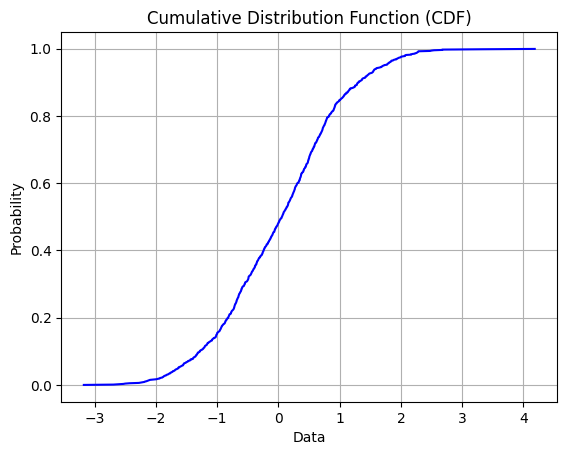

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data (normally distributed)
data = np.random.normal(loc=0, scale=1, size=1000)

# Calculate the CDF
sorted_data = np.sort(data)
yvals = np.arange(len(sorted_data)) / float(len(sorted_data))

# Plot the CDF
plt.plot(sorted_data, yvals, color='blue')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Data')
plt.ylabel('Probability')
plt.grid(True)
plt.show()


In [ ]:
# data collected from fping:
# 172.27.0.0 : xmt/rcv/%loss = 5/5/0%, min/avg/max = 0.099/0.111/0.134
# xmt is the number of packets sent
# rcv is the number of packets received
# loss is the percentage of packets lost
# min is the minimum round-trip time (RTT) in milliseconds
# avg is the average RTT in milliseconds
# max is the maximum RTT in milliseconds

# Topologies we will consider:
# 1. Fully connected
# 2. Star
# 3. Line
# 4. Ring
# 5. Mesh

# Will test this with 3,6 nodes 


# Fully connected: every node is connected to every other node
# Star: all nodes are connected to a central node
# Pairs: two nodes will move together(simulating fire fighters moving in pairs)
# We will examine static and dynamic topologies

# for [STATIC, DYNAMIC]: ## Analyze the impact of mobility on performance
    # for [BATMAN, and OLSR]: ## Compare the performance of BATMAN and OLSR
        # for [STAR, LINE, PAIRS]: ## Analyze the impact of network topology on performance
            # for [3, 6 NODES]: ## Analyze Scalability 
                # 1. Collect data from fping and iperf
                    # - fping: min, max, avg round-trip time (RTT) and packet loss to each node in the network
                    # - iperf: throughput, rtx, RTT, congestion window, receiver window, CPU utilization to the base station, bandiwdth, jitter(rtt variance)
                # 2. Visualize the data using plots
                # 3. Calculate the following statistics:
                    # - Mean, Median, Max, Min, Standard Deviation for each metric
                    # - Box plots for each metric
                    # - CDF for each metric
                    # - Connectivity: which nodes are connected to which other nodes
            
    # new tesT: long term performance of the network
    # 1. Run iperf for an extended period of time (e.g., 24 hours)




    # 4. Visualize the network topology using the BATMAN-adv data
    # 5. Compare the performance of BATMAN-adv and OLSR
    # 6. Analyze the impact of network topology on performance
#  Analyze scalability 
# in real world networks, the topology rapidly changes, so by examing the performance of different routing protocols under different static topologies, we can gain insights into how they perform in real-world scenarios.
# we can examine how each topology migra

# using this data, we can calculate the following:


# ping data to every other node. 

# methodology: setting up a simple benchmark that performs back to back rtt measurements by sending and recieving 20 byte requsts and replies from the server 
# cdf of the mesarued rtts from the pixel to the linksys
# talk about complexities of not using iperf with several ports because of collisions 

In [16]:
# Load the JSON data
data = '''
{
    "start": {
        "connected": [
            {
                "socket": 5,
                "local_host": "172.27.0.1",
                "local_port": 51962,
                "remote_host": "172.27.0.0",
                "remote_port": 54321
            },
            {
                "socket": 7,
                "local_host": "172.27.0.1",
                "local_port": 51972,
                "remote_host": "172.27.0.0",
                "remote_port": 54321
            }
        ],
        "version": "iperf 3.12",
        "system_info": "Linux pi1 6.6.20+rpt-rpi-v7 #1 SMP Raspbian 1:6.6.20-1+rpt1 (2024-03-07) armv7l",
        "timestamp": {
            "time": "Mon, 01 Apr 2024 05:04:27 GMT",
            "timesecs": 1711947867
        },
        "connecting_to": {
            "host": "172.27.0.0",
            "port": 54321
        },
        "cookie": "5xp632x3duf3yn3zkbctl3akeaabo52l7f7o",
        "tcp_mss_default": 1448,
        "target_bitrate": 0,
        "sock_bufsize": 0,
        "sndbuf_actual": 16384,
        "rcvbuf_actual": 131072,
        "test_start": {
            "protocol": "TCP",
            "num_streams": 1,
            "blksize": 131072,
            "omit": 0,
            "duration": 3,
            "bytes": 0,
            "blocks": 0,
            "reverse": 0,
            "tos": 0,
            "target_bitrate": 0
        }
    },
    "intervals": [
        {
            "streams": [
                {
                    "socket": 5,
                    "start": 0,
                    "end": 0.500124,
                    "seconds": 0.5001239776611328,
                    "bytes": 469152,
                    "bits_per_second": 7504571.2016292345,
                    "retransmits": 0,
                    "snd_cwnd": 50680,
                    "snd_wnd": 407936,
                    "rtt": 41645,
                    "rttvar": 5719,
                    "pmtu": 1500,
                    "omitted": false,
                    "sender": true
                },
                {
                    "socket": 7,
                    "start": 0,
                    "end": 0.500146,
                    "seconds": 0.500145971775055,
                    "bytes": 480736,
                    "bits_per_second": 7689531.090994615,
                    "omitted": false,
                    "sender": false
                }
            ],
            "sum": {
                "start": 0,
                "end": 0.500124,
                "seconds": 0.5001239776611328,
                "bytes": 469152,
                "bits_per_second": 7504571.2016292345,
                "retransmits": 0,
                "omitted": false,
                "sender": true
            },
            "sum_bidir_reverse": {
                "start": 0,
                "end": 0.500124,
                "seconds": 0.5001239776611328,
                "bytes": 480736,
                "bits_per_second": 7689869.25599045,
                "omitted": false,
                "sender": false
            }
        },
        {
            "streams": [
                {
                    "socket": 5,
                    "start": 0.500124,
                    "end": 1.000146,
                    "seconds": 0.500021994113922,
                    "bytes": 325800,
                    "bits_per_second": 5212570.70825203,
                    "retransmits": 0,
                    "snd_cwnd": 63712,
                    "snd_wnd": 407936,
                    "rtt": 113784,
                    "rttvar": 51547,
                    "pmtu": 1500,
                    "omitted": false,
                    "sender": true
                },
                {
                    "socket": 7,
                    "start": 0.500146,
                    "end": 1.00018,
                    "seconds": 0.500033974647522,
                    "bytes": 250504,
                    "bits_per_second": 4007791.67338111,
                    "omitted": false,
                    "sender": false
                }
            ],
            "sum": {
                "start": 0.500124,
                "end": 1.000146,
                "seconds": 0.500021994113922,
                "bytes": 325800,
                "bits_per_second": 5212570.70825203,
                "retransmits": 0,
                "omitted": false,
                "sender": true
            },
            "sum_bidir_reverse": {
                "start": 0.500124,
                "end": 1.000146,
                "seconds": 0.500021994113922,
                "bytes": 250504,
                "bits_per_second": 4007887.700122673,
                "omitted": false,
                "sender": false
            }
        },
        {
            "streams": [
                {
                    "socket": 5,
                    "start": 1.000146,
                    "end": 1.500169,
                    "seconds": 0.5000230073928833,
                    "bytes": 260640,
                    "bits_per_second": 4170048.1161293,
                    "retransmits": 0,
                    "snd_cwnd": 70952,
                    "snd_wnd": 407936,
                    "rtt": 61490,
                    "rttvar": 10621,
                    "pmtu": 1500,
                    "omitted": false,
                    "sender": true
                },
                {
                    "socket": 7,
                    "start": 1.00018,
                    "end": 1.500191,
                    "seconds": 0.5000110268592834,
                    "bytes": 372136,
                    "bits_per_second": 5954044.691174046,
                    "omitted": false,
                    "sender": false
                }
            ],
            "sum": {
                "start": 1.000146,
                "end": 1.500169,
                "seconds": 0.5000230073928833,
                "bytes": 260640,
                "bits_per_second": 4170048.1161293,
                "retransmits": 0,
                "omitted": false,
                "sender": true
            },
            "sum_bidir_reverse": {
                "start": 1.000146,
                "end": 1.500169,
                "seconds": 0.5000230073928833,
                "bytes": 372136,
                "bits_per_second": 5953902.0324735,
                "omitted": false,
                "sender": false
            }
        },
        {
            "streams": [
                {
                    "socket": 5,
                    "start": 1.500169,
                    "end": 2.000123,
                    "seconds": 0.4999539852142334,
                    "bytes": 390960,
                    "bits_per_second": 6255935.73108487,
                    "retransmits": 0,
                    "snd_cwnd": 82536,
                    "snd_wnd": 407936,
                    "rtt": 34350,
                    "rttvar": 20246,
                    "pmtu": 1500,
                    "omitted": false,
                    "sender": true
                },
                {
                    "socket": 7,
                    "start": 1.500191,
                    "end": 2.000146,
                    "seconds": 0.4999549984931946,
                    "bytes": 388064,
                    "bits_per_second": 6209582.881172572,
                    "omitted": false,
                    "sender": false
                }
            ],
            "sum": {
                "start": 1.500169,
                "end": 2.000123,
                "seconds": 0.4999539852142334,
                "bytes": 390960,
                "bits_per_second": 6255935.73108487,
                "retransmits": 0,
                "omitted": false,
                "sender": true
            },
            "sum_bidir_reverse": {
                "start": 1.500169,
                "end": 2.000123,
                "seconds": 0.4999539852142334,
                "bytes": 388064,
                "bits_per_second": 6209595.466410168,
                "omitted": false,
                "sender": false
            }
        },
        {
            "streams": [
                {
                    "socket": 5,
                    "start": 2.000123,
                    "end": 2.500123,
                    "seconds": 0.5,
                    "bytes": 390960,
                    "bits_per_second": 6255360,
                    "retransmits": 0,
                    "snd_cwnd": 95568,
                    "snd_wnd": 407936,
                    "rtt": 81640,
                    "rttvar": 40805,
                    "pmtu": 1500,
                    "omitted": false,
                    "sender": true
                },
                {
                    "socket": 7,
                    "start": 2.000146,
                    "end": 2.500145,
                    "seconds": 0.4999989867210388,
                    "bytes": 324352,
                    "bits_per_second": 5189642.517111157,
                    "omitted": false,
                    "sender": false
                }
            ],
            "sum": {
                "start": 2.000123,
                "end": 2.500123,
                "seconds": 0.5,
                "bytes": 390960,
                "bits_per_second": 6255360,
                "retransmits": 0,
                "omitted": false,
                "sender": true
            },
            "sum_bidir_reverse": {
                "start": 2.000123,
                "end": 2.500123,
                "seconds": 0.5,
                "bytes": 324352,
                "bits_per_second": 5189632,
                "omitted": false,
                "sender": false
            }
        },
        {
            "streams": [
                {
                    "socket": 5,
                    "start": 2.500123,
                    "end": 3.000315,
                    "seconds": 0.5001919865608215,
                    "bytes": 260640,
                    "bits_per_second": 4168639.3545340355,
                    "retransmits": 0,
                    "snd_cwnd": 101360,
                    "snd_wnd": 407936,
                    "rtt": 56965,
                    "rttvar": 6836,
                    "pmtu": 1500,
                    "omitted": false,
                    "sender": true
                },
                {
                    "socket": 7,
                    "start": 2.500145,
                    "end": 3.000336,
                    "seconds": 0.5001909732818604,
                    "bytes": 317112,
                    "bits_per_second": 5071854.822478864,
                    "omitted": false,
                    "sender": false
                }
            ],
            "sum": {
                "start": 2.500123,
                "end": 3.000315,
                "seconds": 0.5001919865608215,
                "bytes": 260640,
                "bits_per_second": 4168639.3545340355,
                "retransmits": 0,
                "omitted": false,
                "sender": true
            },
            "sum_bidir_reverse": {
                "start": 2.500123,
                "end": 3.000315,
                "seconds": 0.5001919865608215,
                "bytes": 317112,
                "bits_per_second": 5071844.54801641,
                "omitted": false,
                "sender": false
            }
        }
    ],
    "end": {
        "streams": [
            {
                "sender": {
                    "socket": 5,
                    "start": 0,
                    "end": 3.000315,
                    "seconds": 3.000315,
                    "bytes": 2098152,
                    "bits_per_second": 5594484.579119192,
                    "retransmits": 0,
                    "max_snd_cwnd": 101360,
                    "max_snd_wnd": 407936,
                    "max_rtt": 113784,
                    "min_rtt": 34350,
                    "mean_rtt": 64979,
                    "sender": true
                },
                "receiver": {
                    "socket": 5,
                    "start": 0,
                    "end": 3.33232,
                    "seconds": 3.000315,
                    "bytes": 1817240,
                    "bits_per_second": 4362702.261487492,
                    "sender": true
                }
            },
            {
                "sender": {
                    "socket": 7,
                    "start": 0,
                    "end": 3.000315,
                    "seconds": 3.000315,
                    "bytes": 2299424,
                    "bits_per_second": 6131153.562209302,
                    "retransmits": 1,
                    "max_snd_cwnd": 14480,
                    "max_snd_wnd": 33280,
                    "max_rtt": 9577,
                    "min_rtt": 9577,
                    "mean_rtt": 9577,
                    "sender": false
                },
                "receiver": {
                    "socket": 7,
                    "start": 0,
                    "end": 3.33232,
                    "seconds": 3.000315,
                    "bytes": 2132904,
                    "bits_per_second": 5120526.239976953,
                    "sender": false
                }
            }
        ],
        "sum_sent": {
            "start": 0,
            "end": 3.000315,
            "seconds": 3.000315,
            "bytes": 2098152,
            "bits_per_second": 5594484.579119192,
            "retransmits": 0,
            "sender": true
        },
        "sum_received": {
            "start": 0,
            "end": 3.33232,
            "seconds": 3.33232,
            "bytes": 1817240,
            "bits_per_second": 4362702.261487492,
            "sender": true
        },
        "sum_sent_bidir_reverse": {
            "start": 0,
            "end": 3.000315,
            "seconds": 3.000315,
            "bytes": 2299424,
            "bits_per_second": 6131153.562209302,
            "retransmits": 1,
            "sender": false
        },
        "sum_received_bidir_reverse": {
            "start": 0,
            "end": 3.33232,
            "seconds": 3.33232,
            "bytes": 2132904,
            "bits_per_second": 5120526.239976953,
            "sender": false
        },
        "cpu_utilization_percent": {
            "host_total": 3.229451495487746,
            "host_user": 0.18711990259157507,
            "host_system": 3.042299252781654,
            "remote_total": 2.755005281352026,
            "remote_user": 0.14274654311503746,
            "remote_system": 2.6121987228730554
        },
        "sender_tcp_congestion": "cubic",
        "receiver_tcp_congestion": "cubic"
    }
}
'''

# Parse the JSON
json_data = json.loads(data)

# Initialize a list to store bandwidth data
bandwidth_data = []

# Iterate through intervals
for interval in json_data['intervals']:
    # Iterate through streams within the interval
    for stream in interval['streams']:
        # Extract the bits_per_second field
        bandwidth = stream['bits_per_second']
        # Append bandwidth to the list
        bandwidth_data.append(bandwidth)

# Print the extracted bandwidth data
print("Bandwidth data:")
for i, bandwidth in enumerate(bandwidth_data, start=1):
    # print(f"Interval {i}: {bandwidth} bits per second")
    # print Mbps
    print(f"Interval {i}: {bandwidth/1e6} Mbps")

# Parse the JSON
json_data = json.loads(data)

# Initialize a list to store jitter data
jitter_data = []

# Iterate through intervals
for interval in json_data['intervals']:
    # Iterate through streams within the interval
    for stream in interval['streams']:
        # Check if the 'rttvar' field is present
        if 'rttvar' in stream:
            # Extract the jitter (RTTVAR) value
            jitter = stream['rttvar']
            # Append jitter to the list
            jitter_data.append(jitter)

# Print the extracted jitter data
print("Jitter data:")
#extract 
for i, jitter in enumerate(jitter_data, start=1):
    # print(f"Interval {i}: {jitter} microseconds")
    # turn to milliseconds
    print(f"Interval {i}: {jitter/1000} milliseconds")


Bandwidth data:
Interval 1: 7.5045712016292345 Mbps
Interval 2: 7.689531090994615 Mbps
Interval 3: 5.212570708252031 Mbps
Interval 4: 4.00779167338111 Mbps
Interval 5: 4.1700481161293 Mbps
Interval 6: 5.9540446911740466 Mbps
Interval 7: 6.25593573108487 Mbps
Interval 8: 6.209582881172572 Mbps
Interval 9: 6.25536 Mbps
Interval 10: 5.189642517111157 Mbps
Interval 11: 4.168639354534036 Mbps
Interval 12: 5.071854822478865 Mbps
Jitter data:
Interval 1: 5.719 milliseconds
Interval 2: 51.547 milliseconds
Interval 3: 10.621 milliseconds
Interval 4: 20.246 milliseconds
Interval 5: 40.805 milliseconds
Interval 6: 6.836 milliseconds


In [23]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

# List all JSON files in the current directory
json_files = [f for f in os.listdir('./data/pi1/') if f.endswith('.json') and "perf" in f]
more = [f for f in os.listdir('./data/pi2/') if f.endswith('.json') and "fping" in f]
for m in more:
    json_files.append(m)
# # Initialize lists to store data from all files
# all_throughputs = []
# all_rtts = []
# all_window_sizes = []

# for json_file in json_files:
#     # Load JSON data
#     with open("./data/pi1/"+json_file) as f:
#         data = json.load(f)

#     # Extract interval data
#     intervals = data['intervals']

#     # Calculate throughput for each interval
#     throughputs = []
#     for interval in intervals:
#         throughput = interval['sum']['bits_per_second'] / 1e6  # Mbps
#         throughputs.append(throughput)
#     all_throughputs.extend(throughputs)

#     # Calculate RTT for each interval
#     rtts = []
#     for interval in intervals:
#         if 'streams' in interval:
#             for stream in interval['streams']:
#                 if 'rtt' in stream:
#                     rtts.append(stream['rtt'])
#     all_rtts.extend(rtts)

#     # Calculate window size for each interval
#     window_sizes = []
#     for interval in intervals:
#         if 'streams' in interval:
#             for stream in interval['streams']:
#                 if 'snd_wnd' in stream:
#                     window_sizes.append(stream['snd_wnd'])
#     all_window_sizes.extend(window_sizes)

# # Create CDF plots
# plt.figure(figsize=(12, 8))

# plt.subplot(2, 2, 1)
# plt.title("CDF of Throughput (Mbps)")
# sorted_throughputs = np.sort(all_throughputs)
# yvals = np.arange(len(sorted_throughputs)) / float(len(sorted_throughputs))
# plt.plot(sorted_throughputs, yvals)
# plt.xlabel("Throughput (Mbps)")
# plt.ylabel("Cumulative Probability")

# plt.subplot(2, 2, 2)
# plt.title("CDF of RTT (microseconds)")
# sorted_rtts = np.sort(all_rtts)
# yvals = np.arange(len(sorted_rtts)) / float(len(sorted_rtts))
# plt.plot(sorted_rtts, yvals)
# plt.xlabel("RTT (microseconds)")
# plt.ylabel("Cumulative Probability")

# plt.subplot(2, 2, 3)
# plt.title("CDF of Window Size (bytes)")
# sorted_window_sizes = np.sort(all_window_sizes)
# yvals = np.arange(len(sorted_window_sizes)) / float(len(sorted_window_sizes))
# plt.plot(sorted_window_sizes, yvals)
# plt.xlabel("Window Size (bytes)")
# plt.ylabel("Cumulative Probability")

# plt.tight_layout()
# plt.show()

In [24]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

# List all JSON files in the current directory
# json_files = [f for f in os.listdir('.') if f.endswith('.json')]

# Initialize lists to store data from all files
all_throughputs = []
all_rtts = []
all_window_sizes = []

for json_file in json_files:
    # Load JSON data
    with open("./data/pi"+json_file) as f:
        data = json.load(f)

    # Extract interval data
    intervals = data['intervals']

    # Calculate throughput for each interval
    throughputs = []
    for interval in intervals:
        throughput = interval['sum']['bits_per_second'] / 1e6  # Mbps
        throughputs.append(throughput)
    all_throughputs.extend(throughputs)

    # Calculate RTT for each interval
    rtts = []
    for interval in intervals:
        if 'streams' in interval:
            for stream in interval['streams']:
                if 'rtt' in stream:
                    rtts.append(stream['rtt'])
    all_rtts.extend(rtts)

    # Calculate window size for each interval
    window_sizes = []
    for interval in intervals:
        if 'streams' in interval:
            for stream in interval['streams']:
                if 'snd_wnd' in stream:
                    window_sizes.append(stream['snd_wnd'])
    all_window_sizes.extend(window_sizes)

# Create CDF plot
plt.figure(figsize=(12, 8))

# Throughput CDF
sorted_throughputs = np.sort(all_throughputs)
yvals = np.arange(len(sorted_throughputs)) / float(len(sorted_throughputs))
plt.plot(sorted_throughputs, yvals, label="Throughput (Mbps)")

# RTT CDF
sorted_rtts = np.sort(all_rtts)
yvals = np.arange(len(sorted_rtts)) / float(len(sorted_rtts))
plt.plot(sorted_rtts, yvals, label="RTT (microseconds)")

# Window Size CDF
sorted_window_sizes = np.sort(all_window_sizes)
yvals = np.arange(len(sorted_window_sizes)) / float(len(sorted_window_sizes))
plt.plot(sorted_window_sizes, yvals, label="Window Size (bytes)")

plt.title("Cumulative Distribution Function")
plt.xlabel("Values")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.tight_layout()
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'iperf0.json'